# Task: 문장 감정 분류

In [1]:
#print문 없이 변수 확인 가능한 환경설정
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

# Importing the dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./data/tweet_emotions.csv", header=None)
df

,0,1,2
0,tweet_id,sentiment,content
1,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
2,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
3,1956967696,sadness,Funeral ceremony...gloomy friday...
4,1956967789,enthusiasm,wants to hang out with friends SOON!
...,...,...,...
39996,1753918954,neutral,@JohnLloydTaylor
39997,1753919001,love,Happy Mothers Day All my love
39998,1753919005,love,Happy Mother's Day to all the mommies out ther...
39999,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [4]:
df.shape

(40001, 3)

# EDA 및 전처리

## 필요없는 컬럼 제거

In [5]:
df = df.drop(0, axis=1)
df = df.drop(0, axis=0)
df

,1,2
1,empty,@tiffanylue i know i was listenin to bad habi...
2,sadness,Layin n bed with a headache ughhhh...waitin o...
3,sadness,Funeral ceremony...gloomy friday...
4,enthusiasm,wants to hang out with friends SOON!
5,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39996,neutral,@JohnLloydTaylor
39997,love,Happy Mothers Day All my love
39998,love,Happy Mother's Day to all the mommies out ther...
39999,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


## feature명 변경

In [6]:
df = df.rename({1:'sentiment', 2:'content'}, axis=1)
df

,sentiment,content
1,empty,@tiffanylue i know i was listenin to bad habi...
2,sadness,Layin n bed with a headache ughhhh...waitin o...
3,sadness,Funeral ceremony...gloomy friday...
4,enthusiasm,wants to hang out with friends SOON!
5,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39996,neutral,@JohnLloydTaylor
39997,love,Happy Mothers Day All my love
39998,love,Happy Mother's Day to all the mommies out ther...
39999,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


## 텍스트 전처리

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(sentence):
    #HTML 엔티티 제거
    sentence = re.sub(r"&[a-zA-Z]+;", "", sentence)
    
    # 사용자명 제거
    sentence = re.sub(r"@\w+", "", sentence)  
    
    # 공백 축소
    sentence = re.sub('\s+', ' ', sentence)
    
    #소문자 변환
    sentence = sentence.lower()
    
    #특수 문자 제거(대소문자 및 공백만 두고 나머지 제거)
    sentence = re.sub(r"[^a-zA-Z\s]", "", sentence)
    
    # URL 제거
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    sentence = url_pattern.sub('', sentence)
    
    #토큰화
    tokens = word_tokenize(sentence)
    
    #불용어 제거
    stopword = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stopword]
    
    # 토큰 수가 3보다 작은 경우 빈 문자열 반환
    if len(tokens) < 3:
        return ''
    
    #표제어 추출
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    #반환
    result_text = " ".join(tokens)
    return result_text

In [8]:
df['content'] = df['content'].apply(preprocess_text)

In [9]:
# 빈 문자열 제거
df = df[df['content'] != '']

In [10]:
df

,sentiment,content
1,empty,know listenin bad habit earlier started freaki...
2,sadness,layin n bed headache ughhhhwaitin call
3,sadness,funeral ceremonygloomy friday
4,enthusiasm,want hang friend soon
5,neutral,want trade someone houston ticket one
...,...,...
39995,happiness,succesfully following tayla
39997,love,happy mother day love
39998,love,happy mother day mommy woman man long youre mo...
39999,happiness,wassup beautiful follow peep new hit single ww...


## 생성된 데이터 결측치 및 구조 확인

In [11]:
#결측치 확인
df.isnull().sum(axis=0)

sentiment    0
content      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35752 entries, 1 to 40000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  35752 non-null  object
 1   content    35752 non-null  object
dtypes: object(2)
memory usage: 837.9+ KB


In [13]:
df['sentiment'].value_counts(ascending=False)

worry         7795
neutral       6966
happiness     4812
sadness       4725
love          3528
surprise      1975
fun           1696
relief        1394
hate          1229
enthusiasm     691
empty          671
boredom        170
anger          100
Name: sentiment, dtype: int64

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='sentiment'>

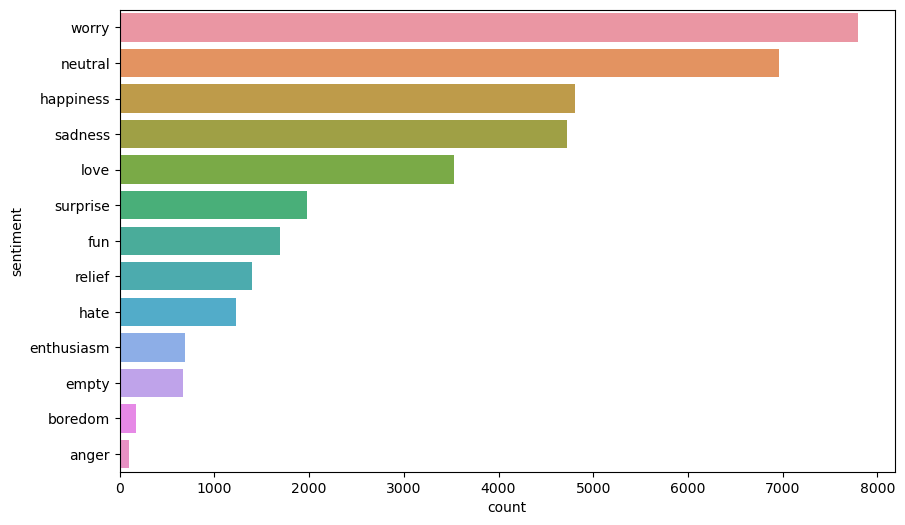

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(y='sentiment', data=df, order = df['sentiment'].value_counts().index)

## Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sentiment'] = le.fit_transform(df['sentiment'])

C:\Users\82108\AppData\Local\Temp\ipykernel_24180\4143307047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = le.fit_transform(df['sentiment'])


In [16]:
df.head()

,sentiment,content
1,2,know listenin bad habit earlier started freaki...
2,10,layin n bed headache ughhhhwaitin call
3,10,funeral ceremonygloomy friday
4,3,want hang friend soon
5,8,want trade someone houston ticket one


# Model

In [17]:
!pip install transformers

In [18]:
!pip install torch

## Loading the pre-trained disbert model

In [19]:
df.head()

,sentiment,content
1,2,know listenin bad habit earlier started freaki...
2,10,layin n bed headache ughhhhwaitin call
3,10,funeral ceremonygloomy friday
4,3,want hang friend soon
5,8,want trade someone houston ticket one


In [20]:
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Stratified sampling을 사용해 데이터크기 축소
* 4만개의 행을 가진 데이터로 deep learning을 진행하려고 하다보니 메모리 문제로 자꾸 멈춤이 발생함 -> stratified sampling을 통해 데이터의 크기를 축소시켜 학습함

In [21]:
from sklearn.model_selection import train_test_split

x = df["content"]
y = df["sentiment"]

x_train, _, y_train, _ = train_test_split(x, y, train_size=10000, stratify=y, random_state=42)

df_sampled = pd.DataFrame({'content':x_train, 'sentiment':y_train})

In [22]:
df_sampled

,content,sentiment
31383,omg found thnx,5
33253,oops im watching mom son sleeping ing,8
14926,kno im sad evry leavin horrible im supposed b ...,10
1860,ever come across something reminds alot one pe...,10
37840,also try friendly fire havent already heard gr...,5
...,...,...
18914,aww dude fair thought point thing,6
38589,enjoying mommy day,4
2121,word counting hand hurt,12
21935,face mask hehe,4


In [23]:
df_sampled['sentiment'].value_counts()

12    2180
8     1948
5     1346
10    1322
7      987
11     552
4      474
9      390
6      344
3      193
2      188
1       48
0       28
Name: sentiment, dtype: int64

## Model : preparing the dataset
* 문장을 bert 모델에 전달하기 전 필요한 형식으로 변환

### Tokenization

In [24]:
labels = df_sampled.loc[:, "sentiment"]
texts = df_sampled.loc[:, "content"]
labels
texts

31383     5
33253     8
14926    10
1860     10
37840     5
         ..
18914     6
38589     4
2121     12
21935     4
24321     8
Name: sentiment, Length: 10000, dtype: int32

31383                                       omg found thnx
33253                oops im watching mom son sleeping ing
14926    kno im sad evry leavin horrible im supposed b ...
1860     ever come across something reminds alot one pe...
37840    also try friendly fire havent already heard gr...
                               ...                        
18914                    aww dude fair thought point thing
38589                                   enjoying mommy day
2121                               word counting hand hurt
21935                                       face mask hehe
24321                               may th starwarsday via
Name: content, Length: 10000, dtype: object

In [25]:
tokenized = df_sampled['content'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
tokenized

31383          [101, 18168, 2290, 2179, 16215, 26807, 102]
33253    [101, 1051, 11923, 10047, 3666, 3566, 2365, 57...
14926    [101, 14161, 2080, 10047, 6517, 23408, 2854, 1...
1860     [101, 2412, 2272, 2408, 2242, 15537, 2632, 414...
37840    [101, 2036, 3046, 5379, 2543, 4033, 2102, 2525...
                               ...                        
18914    [101, 22091, 2860, 12043, 4189, 2245, 2391, 25...
38589                        [101, 9107, 20565, 2154, 102]
2121                   [101, 2773, 10320, 2192, 3480, 102]
21935                   [101, 2227, 7308, 2002, 5369, 102]
24321    [101, 2089, 16215, 2732, 9028, 16150, 4710, 30...
Name: content, Length: 10000, dtype: object

### Padding

In [26]:
tokenized.values

array([list([101, 18168, 2290, 2179, 16215, 26807, 102]),
       list([101, 1051, 11923, 10047, 3666, 3566, 2365, 5777, 13749, 102]),
       list([101, 14161, 2080, 10047, 6517, 23408, 2854, 12203, 6371, 9202, 10047, 4011, 1038, 3407, 2621, 2064, 2102, 10047, 2050, 3335, 23408, 2854, 102]),
       ..., list([101, 2773, 10320, 2192, 3480, 102]),
       list([101, 2227, 7308, 2002, 5369, 102]),
       list([101, 2089, 16215, 2732, 9028, 16150, 4710, 3081, 102])],
      dtype=object)

In [27]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

#가장 긴 문장의 len을 구하고, 짧은 문장들은 뒤에 0을 추가해서 padding 진행
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
padded

array([[  101, 18168,  2290, ...,     0,     0,     0],
       [  101,  1051, 11923, ...,     0,     0,     0],
       [  101, 14161,  2080, ...,     0,     0,     0],
       ...,
       [  101,  2773, 10320, ...,     0,     0,     0],
       [  101,  2227,  7308, ...,     0,     0,     0],
       [  101,  2089, 16215, ...,     0,     0,     0]])

In [28]:
np.array(padded).shape

(10000, 38)

### Masking

In [29]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(10000, 38)

In [30]:
attention_mask

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

## Deep learning

In [31]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

In [32]:
import time

start_time = time.time()

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)
    

end_time = time.time()

execution_time = end_time - start_time
print("실행시간 : {:.2f}초".format(execution_time))

실행시간 : 516.25초


In [33]:
last_hidden_states

BaseModelOutput(last_hidden_state=tensor([[[-0.2119, -0.0429,  0.0134,  ...,  0.0016,  0.2919,  0.3347],
         [-0.2285, -0.0771,  0.2305,  ..., -0.2790,  0.4037,  0.6434],
         [-0.2066, -0.2901,  0.3833,  ..., -0.2589,  0.0803,  0.5664],
         ...,
         [-0.1814, -0.3061,  0.0914,  ...,  0.4309, -0.2672,  0.2827],
         [-0.1648, -0.1960,  0.0909,  ...,  0.3828, -0.1762,  0.3305],
         [-0.1868, -0.1554,  0.1009,  ...,  0.3504, -0.1224,  0.3267]],

        [[-0.2241,  0.2844,  0.1016,  ..., -0.1495,  0.3913,  0.4542],
         [-0.6740,  0.8077,  0.4433,  ...,  0.0297,  0.6494,  0.2652],
         [-0.2993,  0.4834,  0.5944,  ..., -0.2159,  0.2872,  0.3982],
         ...,
         [ 0.0412,  0.0990,  0.5274,  ..., -0.2102,  0.0435,  0.1350],
         [-0.0976,  0.2543,  0.4701,  ..., -0.1508,  0.0746,  0.1171],
         [ 0.1394,  0.2586,  0.4294,  ..., -0.1421, -0.0988, -0.0767]],

        [[-0.3373,  0.0586,  0.1206,  ..., -0.1060,  0.2444,  0.5299],
         [-

In [34]:
features = last_hidden_states[0][:,0,:].numpy()
features

array([[-0.21191911, -0.04289247,  0.01343757, ...,  0.00156489,
         0.29187402,  0.3347061 ],
       [-0.22407512,  0.2843564 ,  0.10162087, ..., -0.14951074,
         0.391261  ,  0.45423722],
       [-0.3373264 ,  0.0586202 ,  0.12055573, ..., -0.10601999,
         0.24438483,  0.52985346],
       ...,
       [-0.18393019,  0.05592763, -0.01737488, ..., -0.11962318,
         0.11541695,  0.2624903 ],
       [-0.33627108,  0.02564908,  0.02634172, ..., -0.27634075,
         0.2537778 ,  0.2681966 ],
       [-0.14268517, -0.07849107,  0.15727296, ..., -0.14197187,
         0.24223775,  0.38847092]], dtype=float32)

In [35]:
labels=df_sampled["sentiment"]
labels

31383     5
33253     8
14926    10
1860     10
37840     5
         ..
18914     6
38589     4
2121     12
21935     4
24321     8
Name: sentiment, Length: 10000, dtype: int32

## Train/Test split & LogisticRegression

In [36]:
x_train, x_test, y_train,  y_test = train_test_split(features, labels)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7500, 768), (2500, 768), (7500,), (2500,))

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [38]:
pred = lr.predict(x_test)
pred

array([12,  5,  5, ...,  6,  8,  5])

## Evaluating

In [39]:
lr.score(x_test, y_test)

0.322

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#accuracy
accuracy = accuracy_score(y_test, pred)
#precision
precision = precision_score(y_test, pred, average='macro')
#recall
recall = recall_score(y_test, pred, average='macro')
#f1_score
f1 = f1_score(y_test, pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.322
Precision: 0.1647537115056242
Recall: 0.15962835318492952
F1 Score: 0.15301426150447464


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#accuracy
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.322


# 성능향상

In [42]:
df.head() 

,sentiment,content
1,2,know listenin bad habit earlier started freaki...
2,10,layin n bed headache ughhhhwaitin call
3,10,funeral ceremonygloomy friday
4,3,want hang friend soon
5,8,want trade someone houston ticket one


In [43]:
df['sentiment'] = le.inverse_transform(df['sentiment'])

In [44]:
df.head()

,sentiment,content
1,empty,know listenin bad habit earlier started freaki...
2,sadness,layin n bed headache ughhhhwaitin call
3,sadness,funeral ceremonygloomy friday
4,enthusiasm,want hang friend soon
5,neutral,want trade someone houston ticket one


In [45]:
df2 = df
df2.head()

,sentiment,content
1,empty,know listenin bad habit earlier started freaki...
2,sadness,layin n bed headache ughhhhwaitin call
3,sadness,funeral ceremonygloomy friday
4,enthusiasm,want hang friend soon
5,neutral,want trade someone houston ticket one


## Reducing categories

In [46]:
df2['sentiment'].value_counts()

worry         7795
neutral       6966
happiness     4812
sadness       4725
love          3528
surprise      1975
fun           1696
relief        1394
hate          1229
enthusiasm     691
empty          671
boredom        170
anger          100
Name: sentiment, dtype: int64

In [47]:
def categorization(sentiment):
    if sentiment in ['happiness', 'love', 'fun', 'relief', 'enthusiasm']:
        return 'positive'
    elif sentiment in ['worry', 'sadness', 'hate', 'anger']:
        return 'negative'
    elif sentiment == 'neutral':
        return 'neutral'
    elif sentiment in ['empty', 'boredom']:
        return 'empty/boredom' #두 감정 모두 감정적인 반응을 보이지 않음 (흥미가 없다거나 감정적으로 무감각)
    elif sentiment == 'surprise':
        return 'surprise' #surprise는 긍정이 될 수도, 부정이 될 수도 있으므로 단독
    else:
        return 'unknown'

In [48]:
df2['sentiment'] = df2['sentiment'].apply(categorization)
df2.head()

,sentiment,content
1,empty/boredom,know listenin bad habit earlier started freaki...
2,negative,layin n bed headache ughhhhwaitin call
3,negative,funeral ceremonygloomy friday
4,positive,want hang friend soon
5,neutral,want trade someone houston ticket one


<Figure size 1200x600 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='sentiment'>

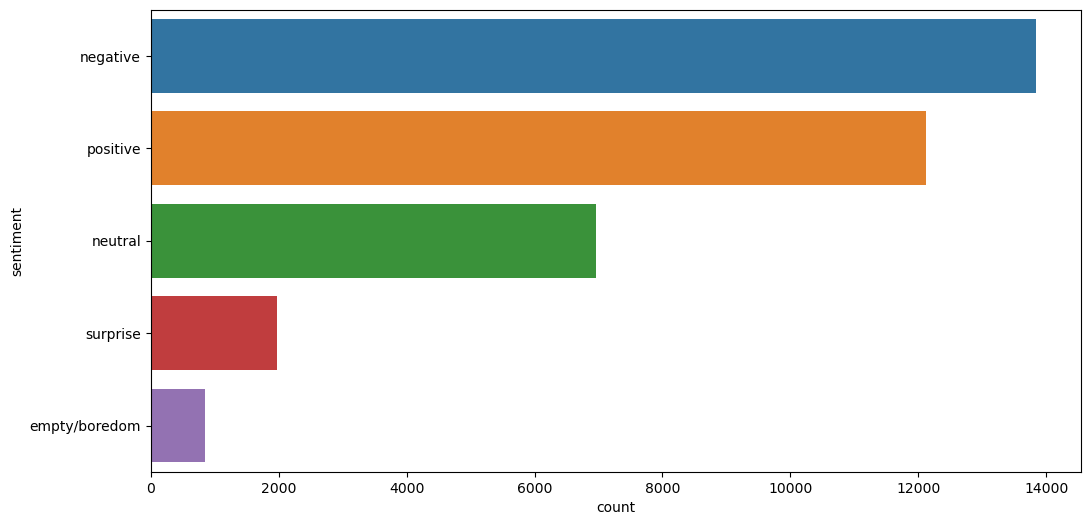

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(y='sentiment', data=df2, order = df2['sentiment'].value_counts().index)

## Stratified sampling

In [50]:
x = df2["content"]
y = df2["sentiment"]

x_train, _, y_train, _ = train_test_split(x, y, train_size=10000, stratify=y, random_state=42)

df_sampled2 = pd.DataFrame({'content':x_train, 'sentiment':y_train})

In [51]:
df_sampled2['sentiment'].value_counts()

negative         3874
positive         3390
neutral          1949
surprise          552
empty/boredom     235
Name: sentiment, dtype: int64

## Preparing dataset - distilbert

In [52]:
labels = df_sampled2.loc[:, "sentiment"]
texts = df_sampled2.loc[:, "content"]
labels
texts

5459      neutral
36069    negative
34623     neutral
24877    positive
12762    surprise
           ...   
10398    negative
21383     neutral
79       negative
18453    negative
13585    positive
Name: sentiment, Length: 10000, dtype: object

5459         ok im frustrated hella dust screen blackberry
36069                                     happy mother day
34623                   juice didntb even let use computer
24877    eventful weekend nice week looking forward fin...
12762                              dude wannnnaaaa goooooo
                               ...                        
10398                                    feel crappy today
21383       think thats muji stabilo eyeing mine last week
79                   sad shin ae got marriedand wasnt alex
18453    im hangin cousin holly tlkin grandparent phone...
13585                             awwwwwwww man baby dried
Name: content, Length: 10000, dtype: object

In [53]:
#tokenization
tokenized = df_sampled2['content'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

#padding
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

#가장 긴 문장의 len을 구하고, 짧은 문장들은 뒤에 0을 추가해서 padding 진행
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

#masking
attention_mask = np.where(padded != 0, 1, 0)

In [54]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

In [55]:
start_time = time.time()

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)
    

end_time = time.time()

execution_time = end_time - start_time
print("실행시간 : {:.2f}초".format(execution_time))

실행시간 : 1135.37초


In [56]:
last_hidden_states

BaseModelOutput(last_hidden_state=tensor([[[-1.5385e-01,  7.2713e-02,  8.2515e-02,  ..., -2.0437e-01,
           2.2180e-01,  3.0742e-01],
         [ 1.4307e-01,  5.8621e-01,  6.0889e-01,  ..., -2.6835e-02,
           3.0449e-01,  2.1144e-01],
         [-2.6475e-01,  3.6879e-01,  4.2169e-01,  ..., -1.6384e-01,
           1.9031e-01,  4.7654e-01],
         ...,
         [ 4.6267e-02,  1.0851e-01,  1.6160e-01,  ..., -2.3273e-02,
          -1.3028e-01,  2.0142e-01],
         [-5.7496e-02,  9.6741e-02,  1.9183e-01,  ..., -3.7689e-03,
          -1.1591e-01,  1.8695e-01],
         [-1.7583e-01,  1.1705e-01,  2.6425e-01,  ...,  8.2515e-03,
          -1.2983e-01,  1.6177e-01]],

        [[-2.0670e-01, -1.5694e-01,  1.5372e-01,  ..., -1.1306e-01,
           1.6110e-01,  3.3893e-01],
         [-1.4225e-01,  1.5439e-01,  5.7348e-01,  ..., -8.2793e-02,
           4.5070e-01,  2.1473e-01],
         [ 1.8926e-02, -3.7374e-01,  3.7850e-01,  ..., -3.2969e-01,
           1.6505e-01,  1.1392e-01],
     

In [57]:
features = last_hidden_states[0][:,0,:].numpy()
features
labels=df_sampled2["sentiment"]
labels

array([[-0.15385434,  0.07271296,  0.08251468, ..., -0.20436928,
         0.22180368,  0.3074177 ],
       [-0.20669799, -0.15693793,  0.15371713, ..., -0.11306448,
         0.16109559,  0.33892694],
       [-0.17889565, -0.0336409 , -0.01029849, ..., -0.20698549,
         0.3377763 ,  0.2735197 ],
       ...,
       [-0.29080486, -0.03437957, -0.00244784, ..., -0.22502403,
         0.40469924,  0.46333855],
       [-0.18297338,  0.15656786, -0.01041197, ..., -0.31541196,
         0.3874374 ,  0.3735156 ],
       [-0.1374458 , -0.07636792, -0.12231088, ..., -0.16121049,
         0.29353416,  0.27347556]], dtype=float32)

5459      neutral
36069    negative
34623     neutral
24877    positive
12762    surprise
           ...   
10398    negative
21383     neutral
79       negative
18453    negative
13585    positive
Name: sentiment, Length: 10000, dtype: object

## Logistic Regression

In [58]:
x_train, x_test, y_train,  y_test = train_test_split(features, labels)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7500, 768), (2500, 768), (7500,), (2500,))

In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [60]:
pred = lr.predict(x_test)
pred

array(['positive', 'positive', 'neutral', ..., 'positive', 'positive',
       'negative'], dtype=object)

## Evaluating

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#accuracy
accuracy = accuracy_score(y_test, pred)
#precision
precision = precision_score(y_test, pred, average='macro')
#recall
recall = recall_score(y_test, pred, average='macro')
#f1_score
f1 = f1_score(y_test, pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5424
Precision: 0.2982513965444581
Recall: 0.31795772639027414
F1 Score: 0.304735659483237


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#accuracy
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5424
